<a href="https://colab.research.google.com/github/raulbenitez/PIB/blob/main/Binaritzacio_Otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binarització i algorisme d'Otsu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we take a look to the image dataset: 

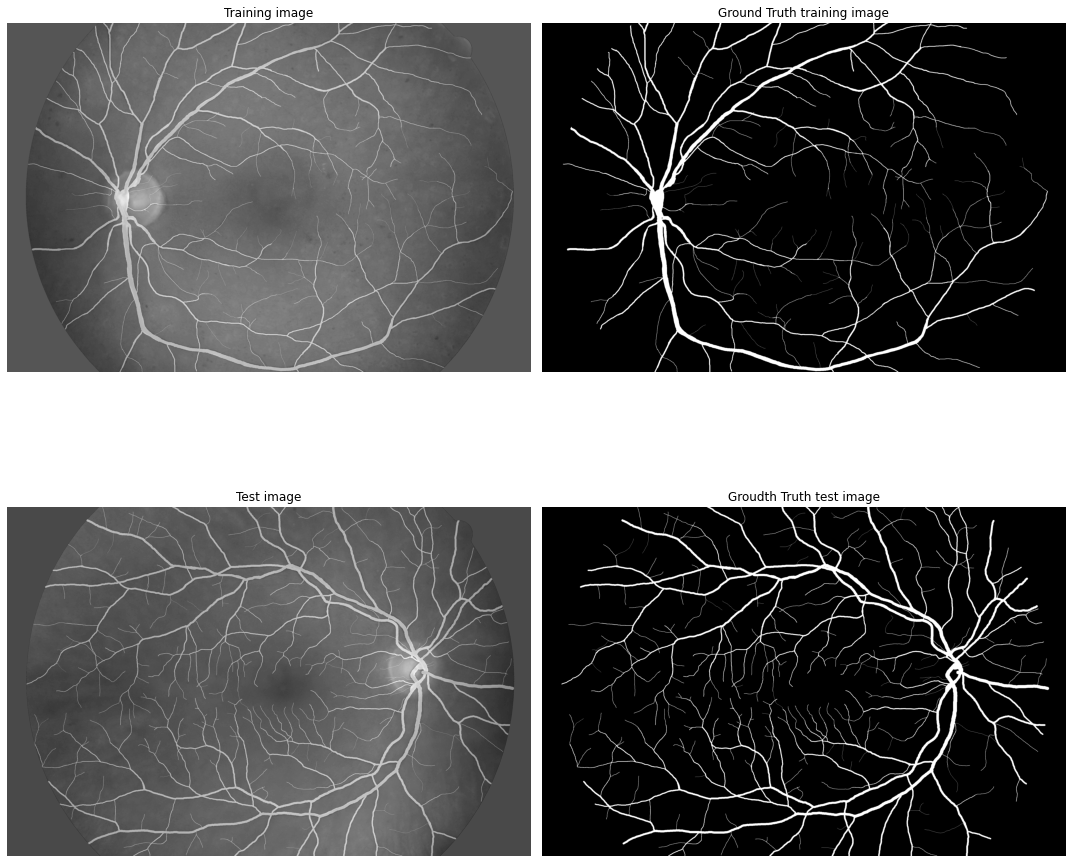

In [ ]:
import skimage as sk 
import matplotlib.pyplot as plt
from skimage import io
import os 
from matplotlib import gridspec

# Path of the folder in your google drive unit where you have the images:

path = '/content/drive/MyDrive/Master Automatic Control and Robotics /PRML/PROBABILISTIC MODELS/Image segmentation lab'

I_train = sk.io.imread(os.path.join(path,'vessels_train.jpg')) 
I_train_GT = sk.io.imread(os.path.join(path,'vessels_train_GT.tif')) 
I_test = sk.io.imread(os.path.join(path,'vessels_test.jpg'))
I_test_GT = sk.io.imread(os.path.join(path,'vessels_test_GT.tif'))

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(I_test, cmap=plt.cm.gray)
ax2.set_title('Test image')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(I_test_GT, cmap=plt.cm.gray)
ax3.set_title('Groudth Truth test image')
ax3.set_axis_off()

plt.tight_layout()
plt.show()

# Binarització amb llindar manual:

A straightforward segmentation approach would be setting a manual grayscale trheshold after inspection of the image histogram:

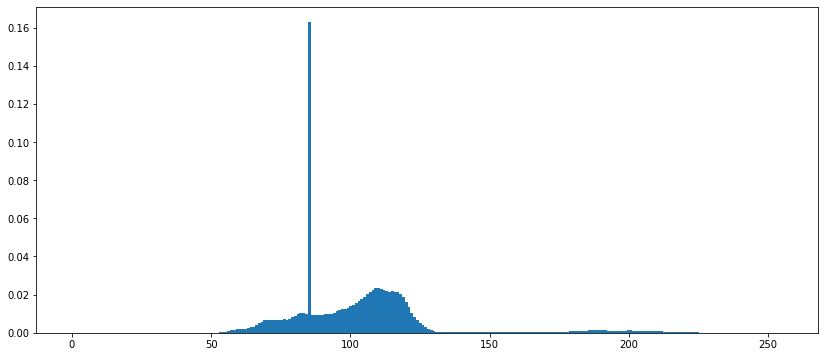

In [ ]:
Çimport matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8) 

fig = plt.figure(figsize=(14, 6))
plt.hist(v_I_train, bins=256,density=True)
plt.show()

since we observe two clear clusters in the histogram we can separate them using a threshold of around 150-160:

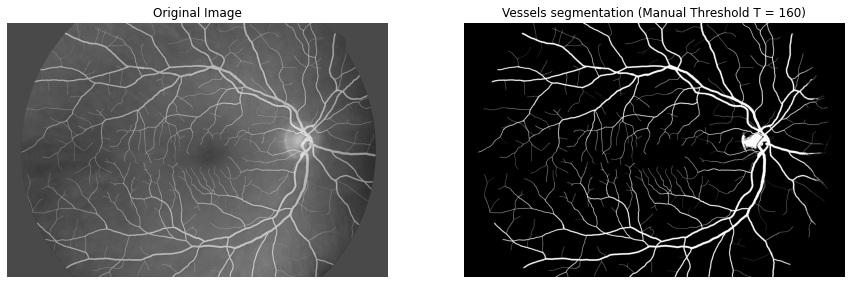

In [ ]:
# Find Otsu's threshold for training image:
threshold_manual = 160

# Apply manual threshold to test image (Image Binarization):
I_manual = I_test >= threshold_manual


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_manual, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Manual Threshold T = {})'.format(threshold_manual))
ax2.set_axis_off()

plt.show()

## algorisme d'Otsu:

The first automatic segmentation approach is the Otsu's Method. 

otsu.png![image.png](attachment:image.png)

The algorithm finds the threshold that **maximum inter-class variance** $\sigma _{b}^{2}(t)$, defined in terms of the difference between the means of the two clusters in the image histogram (pattern and background, respectively):

$\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

The algorithm is the following: 

1. Compute histogram and probabilities of each intensity level $p(i), i=0,\dots L$ where $L=2^n$ for an n-bit grayscale image.

2. Set up initial $\omega _{i}(0)$ and $\mu _{i}(0)$ 

3. Step through all possible thresholds $t=1,\ldots L-1$ 

a) Update $\omega _{i}$ and $\mu _{i}$


$\omega _{0}(t)=\sum _{i=0}^{t-1}p(i)$

$\omega _{1}(t)=\sum _{i=t}^{L-1}p(i)$

$\mu _{0}(t)={\frac {\sum _{i=0}^{t-1}ip(i)}{\omega _{0}(t)}}$

$\mu _{1}(t)={\frac {\sum _{i=t}^{L-1}ip(i)}{\omega _{1}(t)}}$

b) Compute $\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

4. Desired threshold corresponds to the maximum inter-class variance $\sigma _{b}^{2}(t)$ 

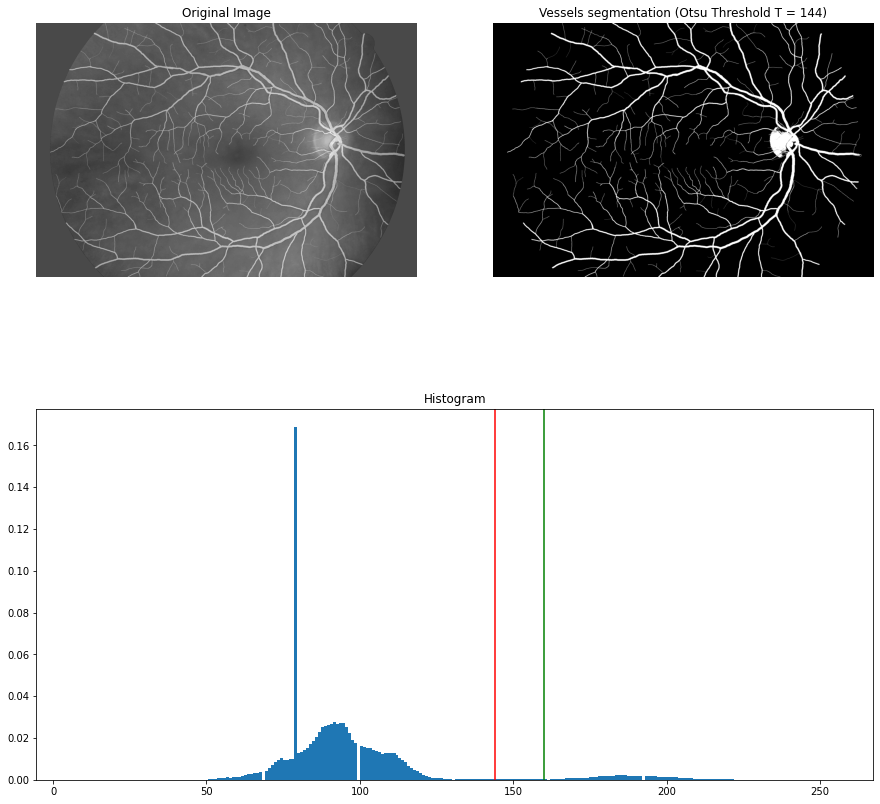

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(I_train)

# Apply threshold to test image:
I_otsu = I_test >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(I_test.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.axvline(threshold_manual, color='g')
ax3.set_title('Histogram')
plt.show()

In [ ]:
threshold_otsu

144